In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Tema

Como tema resolvi escolher uma base de dados em que foram coletadas informações de diversos passageiros de uma companhia de viagem. Nesses registros, foram coletados dados a respeito da vida pessoal e da aquisição do seguro-viagem por essas pessoas. O objetivo desta etapa será criar um modelo que consegue prever quando um cliente irá contratar esse serviço. Esse estudo de caso terá uma ênfase no marketing, posto que ao saber o perfil do cliente que contrata esse serviço. Dessa maneira, os anúncios dessa marca podem se tornar muito mais eficientes.

# Análise exploratória

## Descrição das colunas

Age- Idade
Employment Type- O setor em que o cliente trabalha \
  - Público, Privado \

GraduateOrNot- Se o cliente possui graduação ou não \
  - 1 = sim, 0 = não

AnnualIncome- O ganhou anual do cliente em rúpias indianas

FamilyMembers- Número de membros na família do cliente

ChronicDisease- Se o cliente possui algum problema grave de saúde
- 1 = sim, 0 = não

FrequentFlyer- Avaliação se o cliente viajou muito de avião (entre 2017 e 2019)
- 1 = sim, 0 = não

EverTravelledAbroad- Se o cliente já viajou para algum país estrangeiro
- 1 = sim, 0 = não

TravelInsurance- Se o cliente obteve seguro de viagem

In [3]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Airplane/TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df.describe(include='all')

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN
freq,NaN,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN
mean,993.000000,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323
std,573.741812,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332
min,0.000000,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000
25%,496.500000,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000
50%,993.000000,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000
75%,1489.500000,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000


In [ ]:
df.dropna()

df['Employment Type'].replace(['Government Sector','Private Sector/Self Employed'],[1,0],inplace=True)
df['GraduateOrNot'].replace(['Yes','No'],[1,0],inplace=True)
df['FrequentFlyer'].replace(['Yes','No'],[1,0],inplace=True)
df['EverTravelledAbroad'].replace(['Yes','No'],[1,0],inplace=True)

df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   Employment Type      1987 non-null   int64
 3   GraduateOrNot        1987 non-null   int64
 4   AnnualIncome         1987 non-null   int64
 5   FamilyMembers        1987 non-null   int64
 6   ChronicDiseases      1987 non-null   int64
 7   FrequentFlyer        1987 non-null   int64
 8   EverTravelledAbroad  1987 non-null   int64
 9   TravelInsurance      1987 non-null   int64
dtypes: int64(10)
memory usage: 155.4 KB


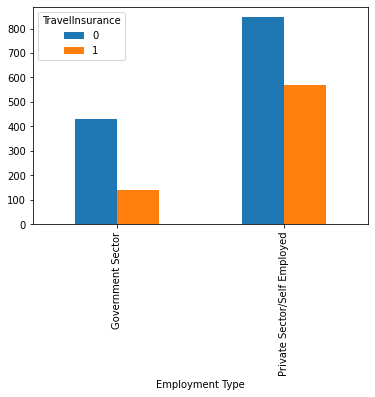

In [ ]:
pd.crosstab([df['Employment Type']], df['TravelInsurance']).plot.bar()

Aqui é possível observar que existe uma amostra menor de funcionários do estado do que em empresas privadas. Sendo que em proporção, os funcionários de empresas privadas contrataram mais do que funcionários do estado:

- Mais da metade dos funcionários de empresas privadas contrataram seguro viagem
- Menos da metade dos funcionários do estado contrataram

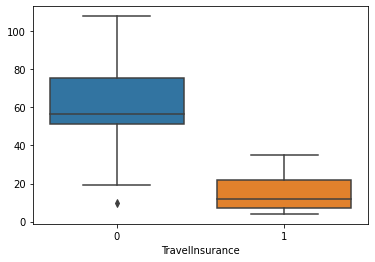

In [ ]:
sns.boxplot(data=pd.crosstab([df['AnnualIncome']], df['TravelInsurance'])[:10])

Como é possível ver nesse boxplot, a grande maioria dos clientes que contrataram ou não um seguro viagem se encontra na faixa dos 200-300mil por ano. Quem ganha mais do que isso tende a não contratar o seguro viagem, como é possível notar na distribuição dos quartis.

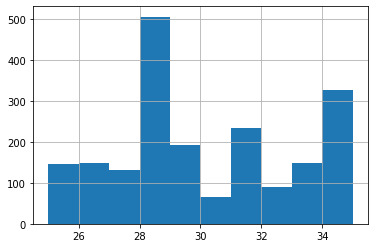

In [ ]:
df['Age'].hist()

Pelo gráfico de distribuição vemos que a maioria dos clientes está concentrada entre os 28 e 30 anos.

# Aprendizado de máquina

In [ ]:
from sklearn.model_selection import train_test_split
treino,teste = train_test_split(df, train_size=0.8)
features = [i for i in treino.columns[1:-1]]

Aqui foi feita a separação da base de dados nas fases de treino e teste. 80% e 20%, respectivamente

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(treino[features],treino['TravelInsurance'])
acctreino = tree.score(treino[features],treino['TravelInsurance'])
acctreino

83.13404657016991

Criando um modelo de árvore de decisão e inserindo a base de dados de treino nele, vemos que o resultado de acurácia se deu em 83%, o que para o nosso contexto de negócio se torna algo bem positivo. Apesar do modelo não apresentar uma eficiência de mais de 90%, se ele se manter nessas métricas será bem útil para o estabelecimento de um perfil do cliente.

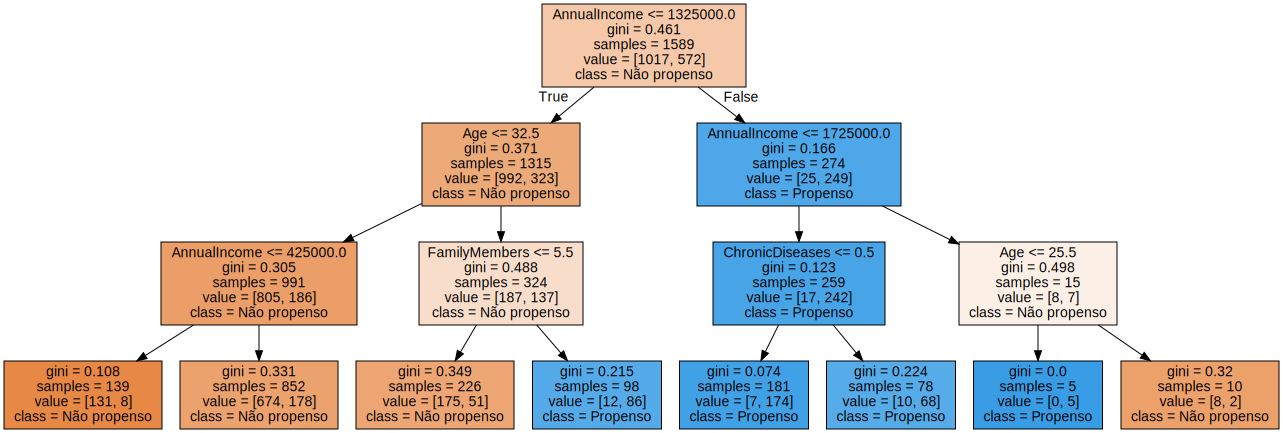

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(tree,filled=True,feature_names = features_treino, class_names = ['Não contratou','Contratou'])
Source (dot_data)

Usando a função Source() que revela alguns nós da árvore de decisão, podemos ter uma melhor ideia dos fatores mais decisivos para a determinação se um cliente irá fazer uma aquisição desse seguro. Sendo assim, temos que:

- Se a renda anual foi menor que 1.325.000, há uma chance bem considerável do cliente contratar. Caso contrário, a chance é bem baixa. 
- Seguindo nos nós à esquerda, temos que caso a idade for maior que 32 anos e o número de membros da família for maior que 5, há uma chance considerável do cliente contratar o seguro.
- Porém, se a idade for menor que 32, a chance desse cliente contratar diminui consideravelmente. 
- Agora, analisando os ramos mais à esquerda, vemos que caso o cliente tenha uma renda anual maior que 1.725.000, ele se torna mais propenso a contratar. Contudo, se ele estiver nessa condição e a sua idade for maior que 25 anos, o modelo avaliou que ele se torna não propenso
- Por fim, a presença de uma doença crônica no organismo do cliente pareceu não ser um fator decisivo para determinar a contratação do seguro

In [ ]:
prev_teste = tree.predict(teste[features])

Realizando agora a previsão em teste

In [ ]:
from sklearn.metrics import accuracy_score
accteste = accuracy_score(prev_teste,teste['TravelInsurance'])
accteste

85.42713567839196

Como é possível observar, o modelo obteve uma acurácia maior ainda em teste, o que significa que o algoritmo interpretou bem as features passadas em treino. Além disso, é notável que não houve underfit, o que é muito positivo no nosso contexto.

[[255   5]
 [ 53  85]]


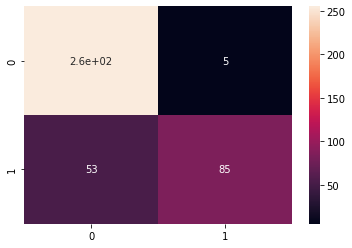

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(teste['TravelInsurance'],prev_teste)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(teste['TravelInsurance'],prev_teste))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       260
           1       0.94      0.62      0.75       138

    accuracy                           0.85       398
   macro avg       0.89      0.80      0.82       398
weighted avg       0.87      0.85      0.85       398



Usando a matriz de confusão e o classification report para ter uma métrica melhor de como o modelo desempenhou, podemos concluir que:

- O modelo tem uma precisão muito maior em casos de não-contratação. No nosso contexto de negócio isso seria prejudicial se o modelo trabalhasse sozinho. Contudo, se o objetivo é ser uma ferramenta para auxiliar os funcionários do marketing, estabelecer o perfil do cliente também é entender quem não contrataria o seguro. 
- Também é possível notar que o modelo apresentou mais falsos positivos do que falsos negativos. Apesar da quantidade expressiva de falsos positivos, ainda é possível tirar bastante proveito das classificações do modelo. 

Por fim, podemos estabelecer que apesar de não ser o modelo ideal, ele pode ser muito bem aproveitado se usado como ferramenta auxiliar de análise dos clientes, assim a empresa poderá ter um marketing direcionado muito mais eficiente e maximizar os seus lucros.